In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Dataset 1

In [96]:
# Read CSV file 1
# https://www.kaggle.com/datasets/ruthgn/new-orleans-airbnb-listings-and-reviews/code
nola_data = pd.read_csv('new_orleans_airbnb_listings.csv')

In [28]:
selected_cols1 = ['id', 'name', 'host_id', 'host_response_time', 'review_scores_rating', 'reviews_per_month']
nola_data = nola_data[selected_cols1]

In [44]:
nola_data = nola_data.dropna()
nola_data.head()

,id,name,host_id,host_response_time,review_scores_rating,reviews_per_month
0,19091,Fully Furnished Cozy Apartment,72880,within an hour,4.89,5.07
1,26834,Maison Mandeville in the Marigny,114452,within a day,4.96,2.30
2,71624,Ravenwood Manor (Historic Bywater),367223,within an hour,4.94,2.21
3,74498,Maison Marais 1: Large Local Living,391462,within an hour,4.90,8.07
4,79536,FeelAtHomeInNO PrivateApt,428362,within an hour,4.86,5.00


#### Dataset 2

In [97]:
# Read CSV file 2
# https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews/code
sephora_data = pd.read_csv('product_info.csv')

In [47]:
selected_cols2 = ['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count', 'rating', 'reviews']
sephora_data = sephora_data[selected_cols2]

In [43]:
sephora_data = sephora_data.dropna()
sephora_data.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0


#### Merged Dataset

In [45]:
big_data = pd.concat([nola_data, sephora_data], axis=1)
big_data = big_data.head(1000)
big_data.head()

,id,name,host_id,host_response_time,review_scores_rating,reviews_per_month,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews
0,19091.0,Fully Furnished Cozy Apartment,72880.0,within an hour,4.89,5.07,P473671,Fragrance Discovery Set,6342.0,19-69,6320.0,3.6364,11.0
1,26834.0,Maison Mandeville in the Marigny,114452.0,within a day,4.96,2.30,P473668,La Habana Eau de Parfum,6342.0,19-69,3827.0,4.1538,13.0
2,71624.0,Ravenwood Manor (Historic Bywater),367223.0,within an hour,4.94,2.21,P473662,Rainbow Bar Eau de Parfum,6342.0,19-69,3253.0,4.2500,16.0
3,74498.0,Maison Marais 1: Large Local Living,391462.0,within an hour,4.90,8.07,P473660,Kasbah Eau de Parfum,6342.0,19-69,3018.0,4.4762,21.0
4,79536.0,FeelAtHomeInNO PrivateApt,428362.0,within an hour,4.86,5.00,P473658,Purple Haze Eau de Parfum,6342.0,19-69,2691.0,3.2308,13.0


#### Plots

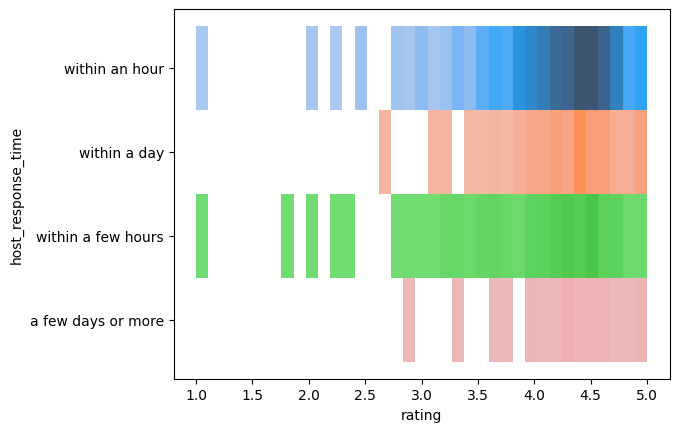

In [54]:
sns.histplot(data=big_data, y="host_response_time", x="rating", hue="host_response_time", legend=False);

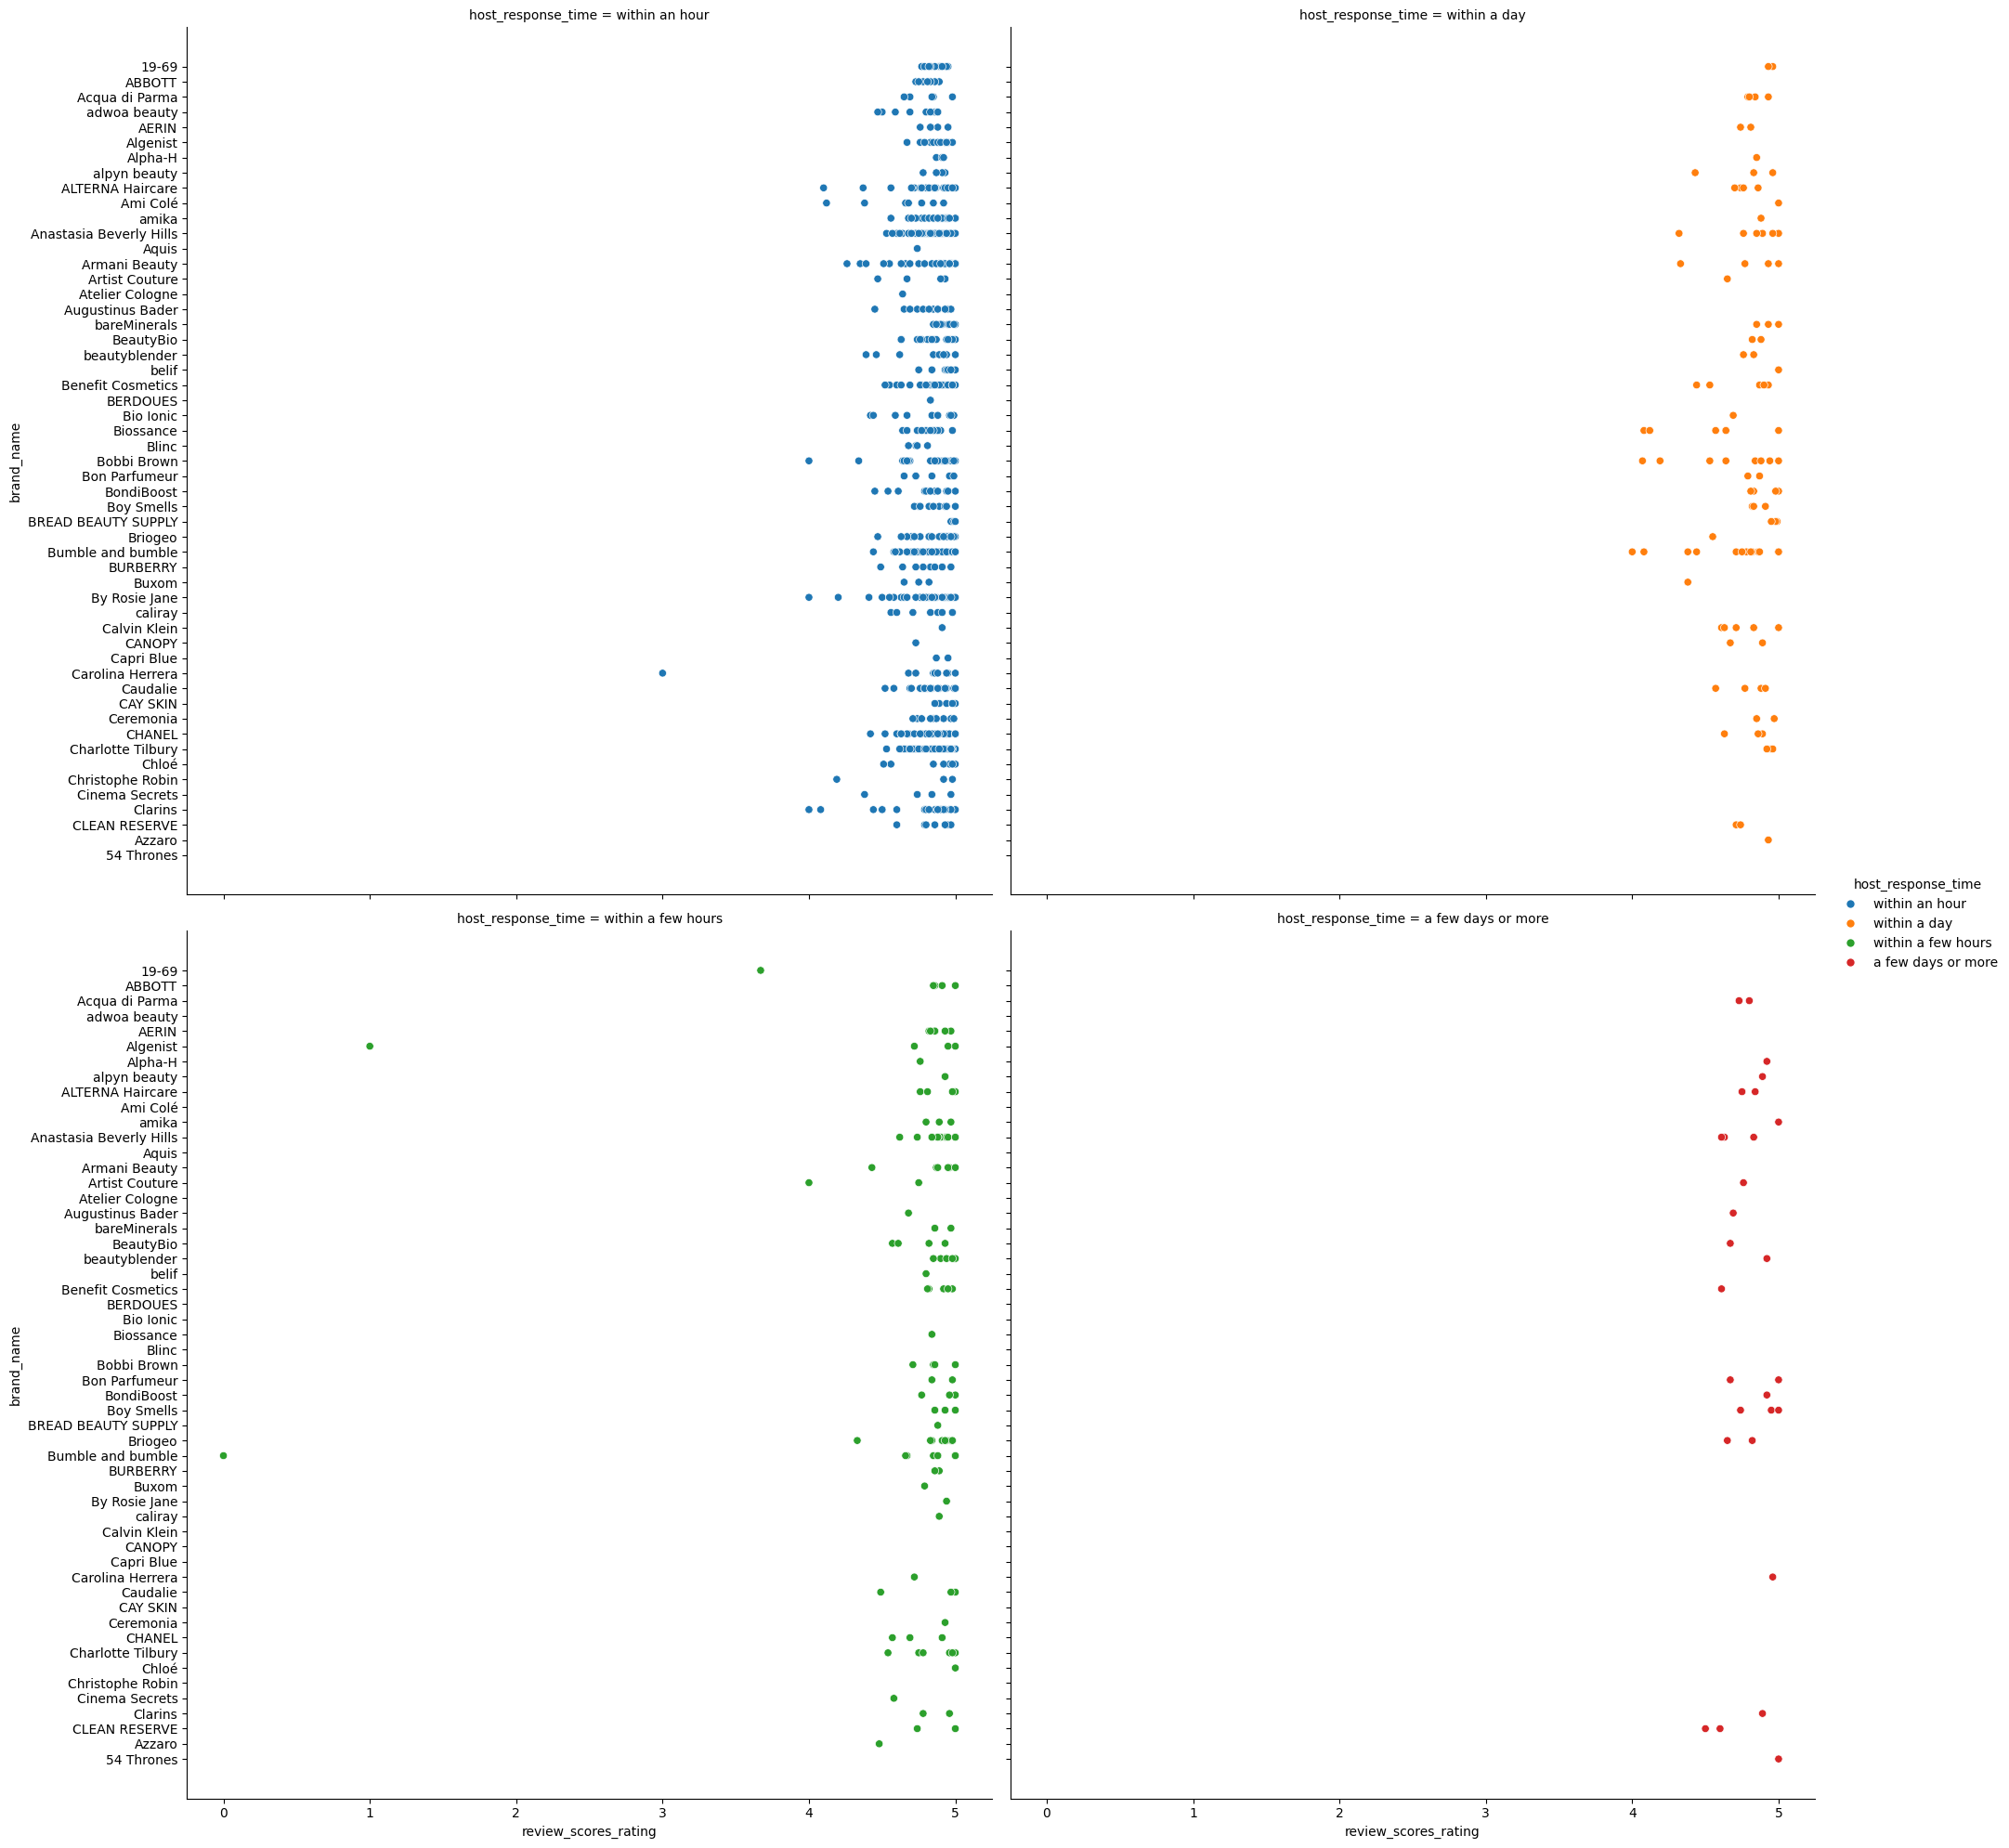

In [64]:
rel = sns.relplot(data=big_data, y="brand_name", x="review_scores_rating", hue="host_response_time", col="host_response_time", col_wrap=2, height=10)

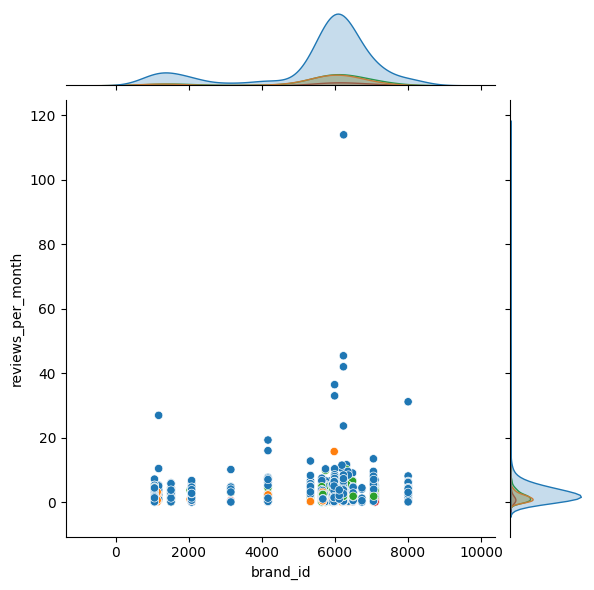

In [70]:
sns.jointplot(data=big_data, y="reviews_per_month", x="brand_id", hue="host_response_time", legend=False);

In [73]:
import chart_studio.plotly as py
import cufflinks as cf

In [74]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [75]:
init_notebook_mode(connected=True)

In [76]:
cf.go_offline()

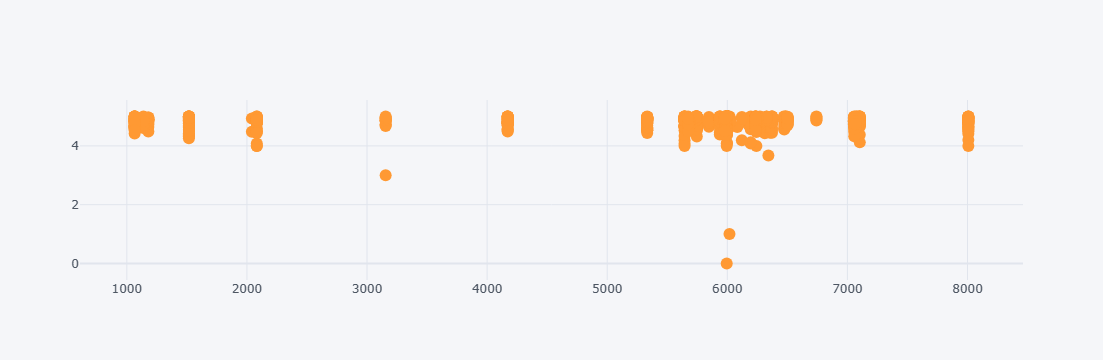

In [88]:
big_data.iplot(y="review_scores_rating", x="brand_id", mode="markers")

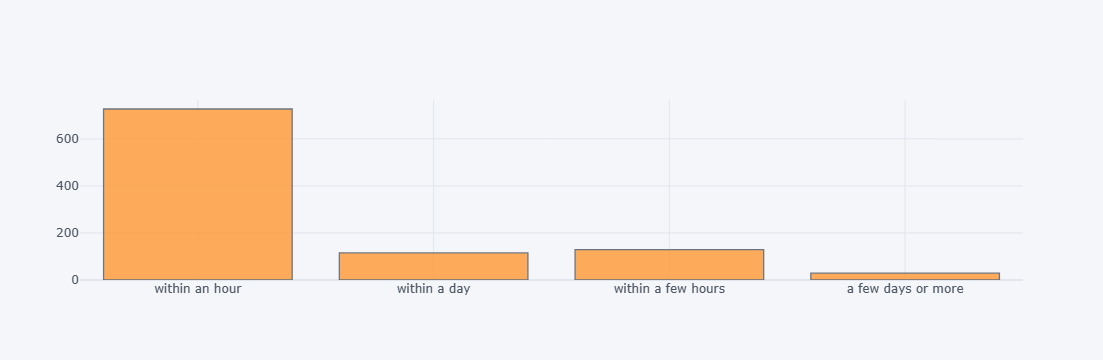

In [95]:
big_data["host_response_time"].iplot(kind="hist")